# **Análise de dados com Python e Pandas** - *Diego Soek*

In [1]:
#Importando o pandas
import pandas as pd

In [2]:
#Lendo os arquivos 
df1 = pd.read_excel("data/Aracaju.xlsx")
df2 = pd.read_excel("data/Fortaleza.xlsx")
df3 = pd.read_excel("data/Natal.xlsx")
df4 = pd.read_excel("data/Recife.xlsx")
df5 = pd.read_excel("data/Salvador.xlsx")

In [3]:
df1.head()

Cidade       Data  Vendas  LojaID  Qtde
0  Aracaju 2018-01-01  142.00    1520     1
1  Aracaju 2018-01-01   14.21    1522     6
2  Aracaju 2018-01-01   71.55    1520     1
3  Aracaju 2018-01-01    3.01    1521     7
4  Aracaju 2018-01-01   24.51    1522     8

In [4]:
#Concatenando os arquivos em um DataFrame
df = pd.concat([df1, df2, df3, df4, df5])

In [5]:
df.sample(10)

Cidade       Data  Vendas  LojaID  Qtde
42    Salvador 2019-01-01   44.28    1034     1
11    Salvador 2019-01-01   30.62    1034     3
107   Salvador 2019-01-01   14.70    1035     1
75   Fortaleza 2019-01-01   19.99    1005     4
19       Natal 2019-03-31  282.00     854     2
97     Aracaju 2018-01-01   32.69    1521     5
77     Aracaju 2018-01-01   24.10    1522     1
134      Natal 2019-01-02  125.90    1036     1
45       Natal 2019-03-11  431.00     852     3
44      Recife 2019-01-01  142.21     983     8

In [6]:
#Verificando os tipos das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#Alterando o tipo da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
#Substituindo os valores nulos pela média da coluna
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [11]:
#Apaga linhas com valores nulos
df.dropna(inplace=True)

In [12]:
#Apaga linhas com valores nulos apenas na coluna Vendas
df.dropna(subset=["Vendas"], inplace = True)

In [13]:
#Apaga linhas que tem valor faltante em qualquer coluna
df.dropna(how="all", inplace=True)

In [14]:
#Criando colunas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [15]:
df.head()

Cidade       Data  Vendas LojaID  Qtde  Receita
0  Aracaju 2018-01-01  142.00   1520     1   142.00
1  Aracaju 2018-01-01   14.21   1522     6    85.26
2  Aracaju 2018-01-01   71.55   1520     1    71.55
3  Aracaju 2018-01-01    3.01   1521     7    21.07
4  Aracaju 2018-01-01   24.51   1522     8   196.08

In [16]:
#Maior valor
df["Receita"].max()

3544.0

In [17]:
df.nlargest(3, "Receita")

Cidade       Data  Vendas LojaID  Qtde  Receita
7   Natal 2019-03-18   886.0    853     4   3544.0
51  Natal 2018-01-21   859.0    852     4   3436.0
55  Natal 2019-01-08   859.0    854     4   3436.0

In [18]:
df.nsmallest(3, "Receita")

Cidade       Data  Vendas LojaID  Qtde  Receita
118  Aracaju 2018-01-01    3.34   1522     1     3.34
65    Recife 2019-01-01    4.01    981     1     4.01
92     Natal 2019-01-02    4.57   1035     1     4.57

In [19]:
df.groupby("Cidade")["Receita"].sum().sort_values()

Cidade
Fortaleza     37913.97
Salvador      40596.73
Aracaju       48748.25
Recife        51936.51
Natal        167227.52
Name: Receita, dtype: float64

In [20]:
df.sort_values("Receita", ascending=False).head(10)

Cidade       Data  Vendas LojaID  Qtde  Receita
7   Natal 2019-03-18   886.0    853     4   3544.0
55  Natal 2019-01-08   859.0    854     4   3436.0
51  Natal 2018-01-21   859.0    852     4   3436.0
30  Natal 2018-10-02   856.0    853     4   3424.0
41  Natal 2018-05-20   835.0    852     4   3340.0
38  Natal 2018-02-25   828.0    852     4   3312.0
10  Natal 2018-10-27   828.0    852     4   3312.0
69  Natal 2019-03-24   817.0    852     4   3268.0
62  Natal 2018-02-10   793.0    854     4   3172.0
52  Natal 2018-04-27   778.0    854     4   3112.0

In [21]:
# *Trabalhando com datas*

In [22]:
#Convertendo a coluna de datas
df["Data"] = df["Data"].astype("int64")

In [23]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [24]:
#Usando pandas para converter a data
df["Data"] = pd.to_datetime(df["Data"])

In [25]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [26]:
#Agrupando por Ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [27]:
#Criando coluna de ano
df["Ano_Venda"] = df["Data"].dt.year

In [28]:
df.sample(10)

Cidade       Data  Vendas LojaID  Qtde  Receita  Ano_Venda
93      Recife 2019-01-01   17.45    980     6   104.70       2019
110      Natal 2019-01-02  185.93   1036     3   557.79       2019
46      Recife 2019-01-01  239.17    981     8  1913.36       2019
223   Salvador 2019-01-02   40.51   1037     2    81.02       2019
96    Salvador 2019-01-01   42.94   1034     3   128.82       2019
39   Fortaleza 2019-01-01  176.51   1005     1   176.51       2019
100     Recife 2019-01-01   35.11    982     4   140.44       2019
130      Natal 2019-01-02   59.78   1036     1    59.78       2019
226   Salvador 2019-01-02   38.32   1035     2    76.64       2019
66       Natal 2019-03-24  559.00    853     2  1118.00       2019

In [29]:
#Colunas mes e dia da Vendas
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [30]:
df.sample(10)

Cidade       Data  Vendas LojaID  Qtde  Receita  Ano_Venda  mes_venda  \
69    Salvador 2019-01-01   14.79   1035     1    14.79       2019          1   
139  Fortaleza 2019-03-02  141.16    980     7   988.12       2019          3   
73      Recife 2019-01-01   39.71    981     5   198.55       2019          1   
122     Recife 2019-03-02  235.06    983     3   705.18       2019          3   
53       Natal 2019-02-14  290.00    854     4  1160.00       2019          2   
41   Fortaleza 2019-02-13  191.29   1002     3   573.87       2019          2   
55    Salvador 2019-01-01   36.62   1036     1    36.62       2019          1   
67     Aracaju 2018-01-01   78.13   1521     4   312.52       2018          1   
52   Fortaleza 2019-01-01   15.22   1003     2    30.44       2019          1   
77   Fortaleza 2019-01-01  167.64   1005     1   167.64       2019          1   

     dia_venda  
69           1  
139          2  
73           1  
122          2  
53          14  
41          13  
55           1  
67           1  
52           1  
77           1

In [31]:
#Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [32]:
#Diferenca entre dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()
df.sample(10)

Cidade       Data  Vendas LojaID  Qtde  Receita  Ano_Venda  mes_venda  \
191      Natal 2019-01-02  173.59   1034     2   347.18       2019          1   
123  Fortaleza 2019-03-02   20.22    981     6   121.32       2019          3   
136      Natal 2019-01-02   13.81   1036     1    13.81       2019          1   
65     Aracaju 2018-01-01  145.54   1522     3   436.62       2018          1   
59       Natal 2018-01-15  369.00    853     2   738.00       2018          1   
158      Natal 2019-01-02  183.64   1037     3   550.92       2019          1   
138     Recife 2019-03-02  150.38    983     6   902.28       2019          3   
25   Fortaleza 2019-01-01   80.31   1004     4   321.24       2019          1   
99     Aracaju 2018-01-01  139.32   1521     3   417.96       2018          1   
141  Fortaleza 2019-03-02  182.75    983     8  1462.00       2019          3   

     dia_venda diferenca_dias  
191          2       366 days  
123          2       425 days  
136          2       366 days  
65           1         0 days  
59          15        14 days  
158          2       366 days  
138          2       425 days  
25           1       365 days  
99           1         0 days  
141          2       425 days

In [33]:
#Coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(10) 

Cidade       Data  Vendas LojaID  Qtde  Receita  Ano_Venda  mes_venda  \
13    Salvador 2019-02-12   39.29   1035     1    39.29       2019          2   
223      Natal 2019-01-02   40.51   1037     2    81.02       2019          1   
74   Fortaleza 2019-01-01  163.09   1005     5   815.45       2019          1   
59   Fortaleza 2019-01-01    6.31   1002     3    18.93       2019          1   
137   Salvador 2019-03-02   51.66   1036     3   154.98       2019          3   
50    Salvador 2019-01-01   44.87   1036     3   134.61       2019          1   
109      Natal 2019-01-02  124.37   1035     1   124.37       2019          1   
65   Fortaleza 2019-01-01  145.20   1005     2   290.40       2019          1   
187   Salvador 2019-01-02    3.85   1035     3    11.55       2019          1   
19       Natal 2019-03-31  282.00    854     2   564.00       2019          3   

     dia_venda diferenca_dias  trimestre_venda  
13          12       407 days                1  
223          2       366 days                1  
74           1       365 days                1  
59           1       365 days                1  
137          2       425 days                1  
50           1       365 days                1  
109          2       366 days                1  
65           1       365 days                1  
187          2       366 days                1  
19          31       454 days                1

In [34]:
#Filtrando por data
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19.sample(15)

Cidade       Data  Vendas LojaID  Qtde  Receita  Ano_Venda  mes_venda  \
137  Fortaleza 2019-03-02   51.99    983     3   155.97       2019          3   
123   Salvador 2019-03-02  127.45   1036     3   382.35       2019          3   
4        Natal 2019-03-09  699.00    853     3  2097.00       2019          3   
125     Recife 2019-03-02   37.60    983     4   150.40       2019          3   
111     Recife 2019-03-02    8.00    981     3    24.00       2019          3   
108     Recife 2019-03-02  152.89    981     4   611.56       2019          3   
131     Recife 2019-03-02  139.07    982     6   834.42       2019          3   
112  Fortaleza 2019-03-02  133.59    982     1   133.59       2019          3   
110  Fortaleza 2019-03-02   51.98    983     6   311.88       2019          3   
131   Salvador 2019-03-02   63.48   1037     3   190.44       2019          3   
132     Recife 2019-03-02   17.49    983     5    87.45       2019          3   
115  Fortaleza 2019-03-02   12.23    981     3    36.69       2019          3   
129  Fortaleza 2019-03-02   35.34    982     7   247.38       2019          3   
138   Salvador 2019-03-02  212.03   1037     3   636.09       2019          3   
82       Natal 2019-03-07  868.00    854     3  2604.00       2019          3   

     dia_venda diferenca_dias  trimestre_venda  
137          2       425 days                1  
123          2       425 days                1  
4            9       432 days                1  
125          2       425 days                1  
111          2       425 days                1  
108          2       425 days                1  
131          2       425 days                1  
112          2       425 days                1  
110          2       425 days                1  
131          2       425 days                1  
132          2       425 days                1  
115          2       425 days                1  
129          2       425 days                1  
138          2       425 days                1  
82           7       430 days                1

# *Visualização de dados*

In [36]:
#Contando as colunas
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

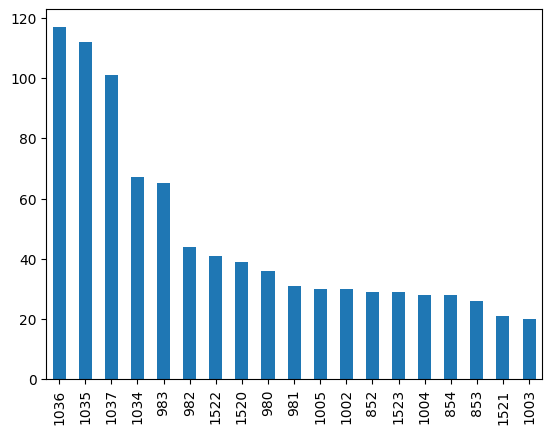

In [39]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

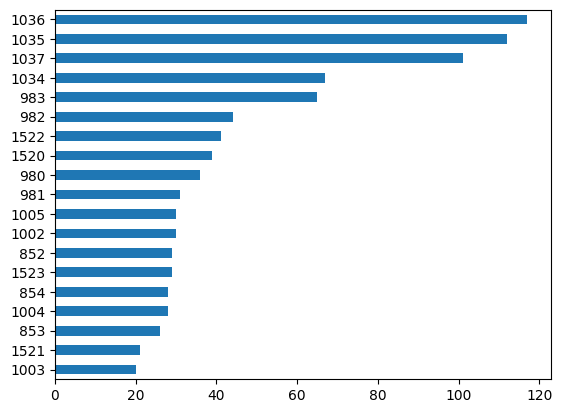

In [44]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot: ylabel='Receita'>

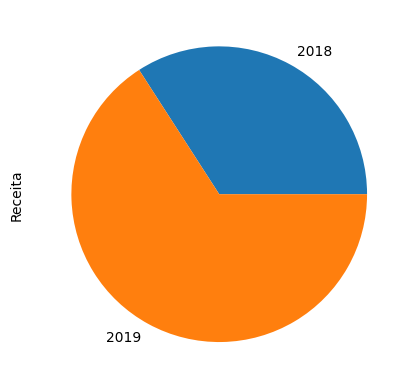

In [46]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [48]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

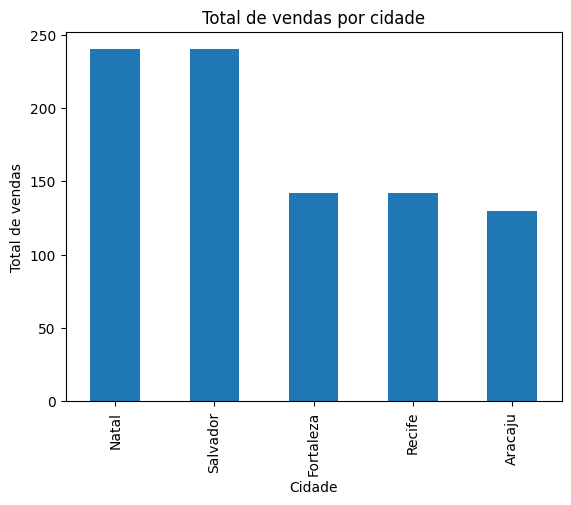

In [50]:
#Adicionando titulos e alterando o nome dos eixos para
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

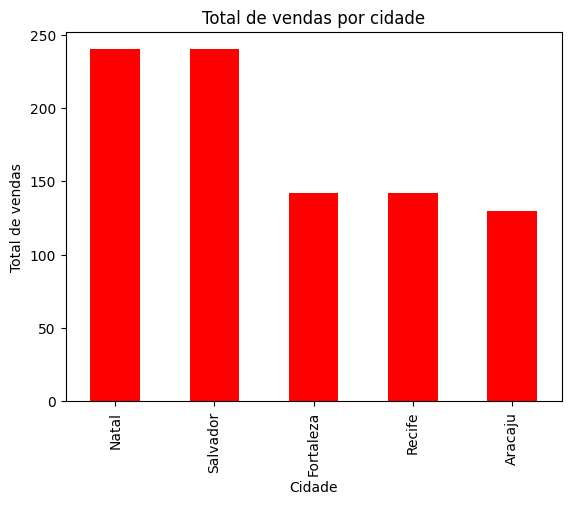

In [51]:
#Alterando a cor das barras
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [52]:
#Alterando o estilo
plt.style.use("ggplot")

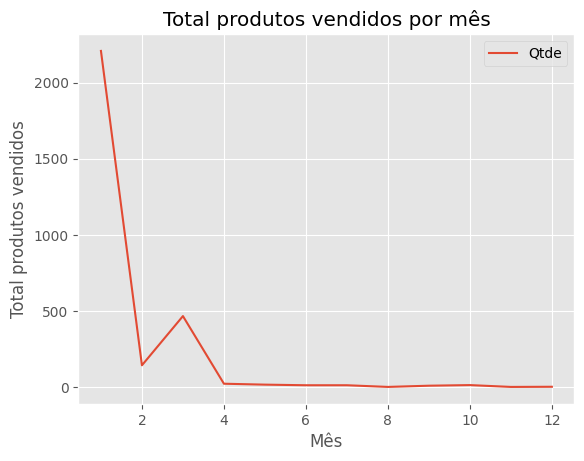

In [54]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

In [55]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [58]:
df_2019 = df[df["Ano_Venda"] == 2019]

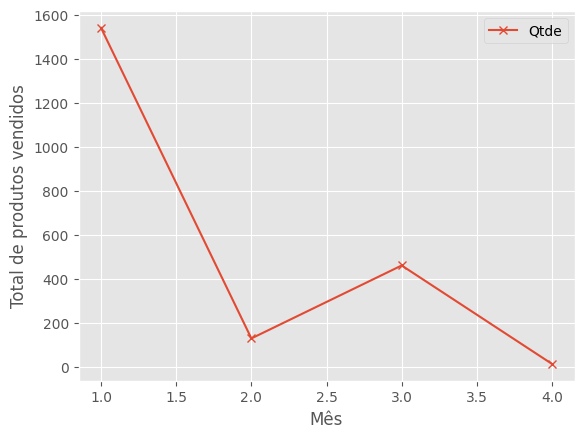

In [66]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="x")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

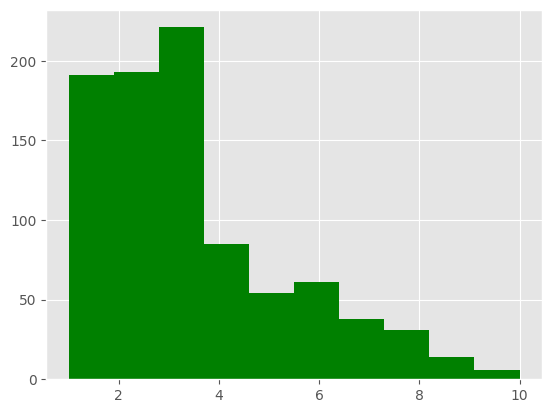

In [68]:
#Histograma
plt.hist(df["Qtde"],color="green")

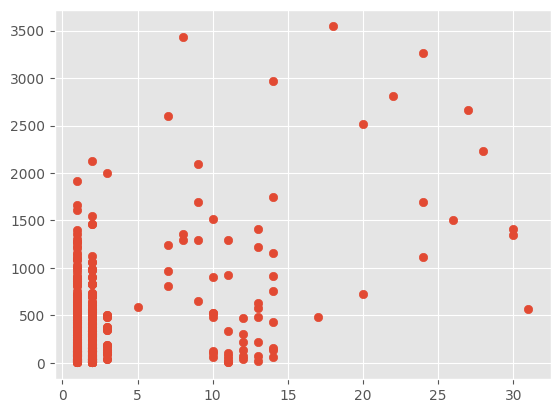

In [69]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"],y=df_2019["Receita"]);

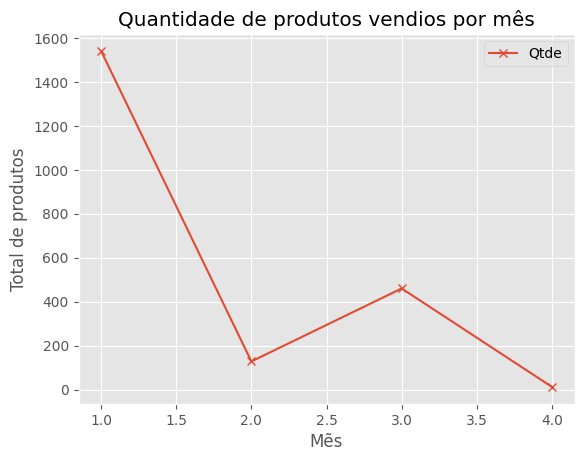

In [70]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="x")
plt.title("Quantidade de produtos vendios por mês")
plt.xlabel("Mẽs")
plt.ylabel("Total de produtos")
plt.legend()
plt.savefig("grafico.png")